#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

# Assignment 2: Covid data - Hazel Chan - May 2, 2022

## Business Report
1. Approach & Thought process
2. Results
3. Conclusions
4. Any recommendations


## 0. Introduction (Objective of Analysis)

This report outlines the approach used and insights observed in data analytics process of the UK covid and vaccination datasets with an objective to help the UK government increase vaccination rates through marketing campaigns of promoting covid vaccine. Recommendations will be made based upon the analysis.

### 0.1 Environment preparation

In [1]:
# Import the required libraries and set plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

**Amend here:** Please change your own directory of where the data files are stored.

In [2]:
# View current directory
!pwd

/Users/hazel/Documents/LSE Data Analytics/Course 2 - Python/Assignment 2/Final


In [3]:
# Create variable to store directory to load data files
dir = '/Users/hazel/Documents/LSE Data Analytics/Course 2 - Python/Assignment 2/Final/Data'

## 1) Assignment activity 1: [Prepare your GitHub repository](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-1-prepare-your-github-repository?module_item_id=20647)

### 1.1) Report:
A github repository was created for Covid analysis project to store all data files, code notebooks and documentation in the cloud and implement version control when new changes are made without affecting main branch before verification.

#### Github Repository
- [My Github Repo](https://github.com/hazz292/LSE_DA_COVID_analysis_Hazel) (Set to public)
- My Github Screenshot

![My Github screenshot](https://github.com/hazz292/LSE_DA_COVID_analysis_Hazel/blob/main/github_screenshot.png?raw=true)

### 1.2) Presentation expectations:
- Describe the role and how workflow tools such as Github can be used to add value to organisations.

#### My Notes:
* Github acts as a version control system which allows all changes in the files to be tracked and stored safely in the cloud. 
* When making changes to the code, team members can create a copy of the files using a fork, then the changes they make will not affect the code in the main branch.
* Then, team members can use a pull request submit their changes for team lead to review and approve before merging with main branch of code.
* This will mitigate the risk of publishing incorrect code that will affect the project and provides an organisational system to store all files related to project which will lead to more efficent workflows and prevent accidental deletions or duplications.

## 2) Assignment activity 2: [Import and explore data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-2-import-and-explore-the-data?module_item_id=20648)

### 2.1) Report:
Data files were imported into python environment to conduct initial exploration of data. This allows the understanding the shape, data type, descriptive statistics and unique values of data sets before determining variables of interest to proceed with analysis. Then, missing data was identified and replaced with zero to prevent inaccurate calculations and errors. After cleaning the data, a subset was created with the variables of interest of covid cases and vaccination DataFrame.




- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features
- Identify missing data
- Filter/subset data
- Aggregate data (totals and by month)
- Note observations




#### Load the covid cases and vaccine data sets as cov and vac respectively

In [4]:
# Show the files in child directory to get file names
!ls Data/

covid_19_uk_cases.csv      tweets.csv
covid_19_uk_vaccinated.csv tweets_2.csv
global_data.csv


In [5]:
# Import datasets
cov_uk = pd.read_csv(dir + '/covid_19_uk_cases.csv')
vac_uk = pd.read_csv(dir + '/covid_19_uk_vaccinated.csv')

print('Imported csv files successfully')

Imported csv files successfully


#### Explore the DataFrames with the appropriate functions

#### DataFrame 1: Covid Cases UK DataFrame

There are 7584 rows and 12 columns in covid DataFrame. The variables of interest including Deaths, Cases, Recovered, Hospitalised should be converted into integer as a person cannot be represented by a decimal place. Also, date should be converted into DateTime datatype.

In [6]:
# View number of rows and columns
print('\nNumber of rows and columns of DataFrame:')
cov_uk.shape


Number of rows and columns of DataFrame:


(7584, 12)

In [7]:
# View information about DataFrame
print('\nDatatype of deach column:\n')
cov_uk.info()


Datatype of deach column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 711.1+ KB


**Observation:** 
Inital exploration concludes that cases, deaths, recovered, hospitalised variables maybe cumulative as the numbers only increase every day. A line plot will be used to confirm whether values are cumulative or daily before conducting aggregation.

In [8]:
# View first and last 5 rows of DataFrame
cov_uk

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0


In [9]:
# View last 10 rows of one province to determine whether variables are cumulative.
cov_uk.loc[cov_uk['Province/State'] == 'Gibraltar'].tail(10)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
4414,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-05,97.0,5590.0,0.0,858.0
4415,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-06,97.0,5597.0,0.0,856.0
4416,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-07,97.0,5606.0,0.0,848.0
4417,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-08,97.0,5608.0,0.0,845.0
4418,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-09,97.0,5613.0,0.0,838.0
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,97.0,5626.0,0.0,858.0
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,97.0,5655.0,0.0,876.0
4421,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-12,97.0,5682.0,0.0,876.0
4422,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-13,97.0,5707.0,0.0,0.0
4423,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-14,97.0,5727.0,0.0,0.0


**Observation:** 

There are 12 provinces in the United Kingdom in which majority British Overseas Territories and Others is the mainland comprising England, Wales, Scotland and Northern Ireland. This is because the number of cases are significantly larger than others as in the filtered DataFrame to 14 October 2021 below. The number of counts are the same as it should be the number of days in the period of data collected from 22 January 2020 to 14 October 2021.

In [10]:
# View descriptive statistics of DataFrame
cov_uk.describe().round(2)

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.00,7584.00,7584.00,7582.00,7582.00,7582.00,7582.00
mean,21.84,-41.44,12.50,6210.20,214708.15,454.69,685.23
std,28.31,30.53,14.01,24860.79,1007556.94,1010.64,819.26
min,-51.80,-81.25,0.00,0.00,0.00,0.00,0.00
25%,17.85,-64.67,0.00,0.00,12.00,0.00,105.00
50%,20.50,-60.86,2.50,1.00,168.50,13.00,390.00
75%,39.45,-5.15,29.00,25.00,1585.00,312.00,955.75
max,55.38,-2.36,29.00,138237.00,8317439.00,8322.00,4907.00


In [11]:
# view dataframe of a specific date
cov_uk[cov_uk['Date'] == '2021-10-14'].sort_values(by='Cases',ascending=False)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
7583,Others,United Kingdom,55.378100,-3.436000,GBR,Northern Europe,0,2021-10-14,138237.0,8317439.0,0.0,0.0
3159,Channel Islands,United Kingdom,49.372300,-2.364400,Others,Northern Europe,0,2021-10-14,100.0,12135.0,0.0,0.0
5055,Isle of Man,United Kingdom,54.236100,-4.548100,IMN,Northern Europe,0,2021-10-14,54.0,8343.0,0.0,0.0
4423,Gibraltar,United Kingdom,36.140800,-5.353600,GIB,Southern Europe,0,2021-10-14,97.0,5727.0,0.0,0.0
1263,Bermuda,United Kingdom,32.307800,-64.750500,BMU,Northern America,0,2021-10-14,95.0,5548.0,0.0,0.0
6951,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,TCA,Latin America and the Caribbean,29,2021-10-14,23.0,2910.0,0.0,0.0
1895,British Virgin Islands,United Kingdom,18.420700,-64.640000,VGB,Latin America and the Caribbean,29,2021-10-14,37.0,2725.0,0.0,0.0
2527,Cayman Islands,United Kingdom,19.313300,-81.254600,CYM,Latin America and the Caribbean,29,2021-10-14,2.0,1011.0,0.0,0.0
631,Anguilla,United Kingdom,18.220600,-63.068600,AIA,Latin America and the Caribbean,29,2021-10-14,1.0,644.0,0.0,0.0
3791,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,FLK,Latin America and the Caribbean,5,2021-10-14,0.0,69.0,0.0,0.0


In [12]:
# View count of unique values in each province/state in UK
cov_uk.value_counts(subset='Province/State', dropna=False)

Province/State
Anguilla                                        632
Bermuda                                         632
British Virgin Islands                          632
Cayman Islands                                  632
Channel Islands                                 632
Falkland Islands (Malvinas)                     632
Gibraltar                                       632
Isle of Man                                     632
Montserrat                                      632
Others                                          632
Saint Helena, Ascension and Tristan da Cunha    632
Turks and Caicos Islands                        632
dtype: int64

#### Handle missing data

Before aggregating data to view total number of cases and vaccinations for each province, missing values were identified to be replaced with zero. There are two rows of missing data for the province Bermuda in September.

In [13]:
# Determine the number of missing values
cov_uk[cov_uk.isna().any(axis=1)]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


In [14]:
# Number of missing values in each column
print('\nNumber of rows with missing data in each column: \n')
print(cov_uk.isna().sum().sort_values(ascending=False))


Number of rows with missing data in each column: 

Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
dtype: int64


**Observations:** 

In the UK covid cases data set, there are 2 rows in 12 columns which has missing values

In [15]:
# Replace missing values with zero in entire DataFrame
cov_uk.fillna(0,inplace=True)

# Check if all missing values are replaced with zero
cov_uk.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                0
dtype: int64

#### Clean data and create subset

After cleaning the dataset by replacing missing values with zero and converting variables to the correct datatype, a subset was created with the clean DataFrame. 

In [16]:
# Convert date column data type to DateTime
cov_uk['Date'] = pd.to_datetime(cov_uk['Date'])
cov_uk.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
dtype: object

In [17]:
# Convert deaths, cases, recovered, hospitalised data type to integer
cov_uk['Deaths'] = cov_uk['Deaths'].astype('int64')
cov_uk['Cases'] = cov_uk['Cases'].astype('int64')
cov_uk['Recovered'] = cov_uk['Recovered'].astype('int64')
cov_uk['Hospitalised'] = cov_uk['Hospitalised'].astype('int64')

cov_uk.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Deaths                               int64
Cases                                int64
Recovered                            int64
Hospitalised                         int64
dtype: object

In [18]:
# Convert Date to Month and add column
cov_uk['Month'] = pd.to_datetime(cov_uk['Date']+pd.offsets.MonthBegin(-1))

# View DataFrame
cov_uk.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Month
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0,0,2020-01-01
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0,0,2020-01-01
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0,0,2020-01-01
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0,0,2020-01-01
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0,0,2020-01-01


In [19]:
# Subset covid cases dataframe
cov_uk_clean = cov_uk[['Province/State', 'Country/Region',
       'Date', 'Month', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised']]

# View subset
cov_uk_clean

,Province/State,Country/Region,Date,Month,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,2020-01-22,2020-01-01,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,2020-01-01,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,2020-01-01,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,2020-01-01,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,2021-10-10,2021-10-01,137735,8154306,0,378
7580,Others,United Kingdom,2021-10-11,2021-10-01,137763,8193769,0,386
7581,Others,United Kingdom,2021-10-12,2021-10-01,137944,8231437,0,386
7582,Others,United Kingdom,2021-10-13,2021-10-01,138080,8272883,0,0


#### DataFrame 2: Covid Vaccination UK DataFrame

In the UK covid vaccination DataFrame, there are same number of observations as cases DataFrame and the variables of interest to analyse for increasing vaccination rate in marketing campaign are Province/State, Date, Vaccinated, First Dose, Second Dose.

In [20]:
# View number of rows and columns
print('\nNumber of rows and column in dataframe:')
vac_uk.shape


Number of rows and column in dataframe:


(7584, 11)

In [21]:
# View information about dataframe
print('\nInformation about dataframe:\n')
vac_uk.info()


Information about dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Vaccinated                7584 non-null   int64  
 9   First Dose                7584 non-null   int64  
 10  Second Dose               7584 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 651.9+ KB


**Observation**: 
These variables do not seem to be cumulative but rather daily as it increases and decreases over time. Plotting these variables over time would provide better visualisation of data.

In [22]:
# View first 5 rows of dataframe
vac_uk.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0


In [23]:
# View last 10 rows of dataframe
vac_uk.tail(10)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
7574,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-05,1571,2274,1571
7575,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-06,1572,1806,1572
7576,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-07,1576,1817,1576
7577,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-08,1599,1743,1599
7578,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-09,1841,1727,1841
7579,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-13,0,0,0
7583,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-14,0,0,0


In [24]:
# view descriptive statistics of dataframe
vac_uk.describe().round(2)

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00
mean,21.84,-41.44,12.50,5913.55,6192.82,5913.55
std,28.31,30.53,14.01,10846.41,11439.88,10846.41
min,-51.80,-81.25,0.00,0.00,0.00,0.00
25%,17.85,-64.67,0.00,0.00,0.00,0.00
50%,20.50,-60.86,2.50,0.00,0.00,0.00
75%,39.45,-5.15,29.00,8338.00,7505.50,8338.00
max,55.38,-2.36,29.00,69619.00,94038.00,69619.00


In [25]:
# View count of unique values in each province/state in UK
vac_uk.value_counts(subset='Province/State', dropna=False)

Province/State
Anguilla                                        632
Bermuda                                         632
British Virgin Islands                          632
Cayman Islands                                  632
Channel Islands                                 632
Falkland Islands (Malvinas)                     632
Gibraltar                                       632
Isle of Man                                     632
Montserrat                                      632
Others                                          632
Saint Helena, Ascension and Tristan da Cunha    632
Turks and Caicos Islands                        632
dtype: int64

In [26]:
# Determine number of province
print(len(vac_uk['Province/State'].unique()))

12


#### Handle missing data

**Observations:** 

In UK vaccination data set, there are also 12 provinces and there are no missing values. Then data type of Date was converted into datatime and subset of the clean DataFrame was created for analysis. Year and month was extracted from date to allow aggregation by month for trend analysis.

In [27]:
# Identify of missing values in each column
print('\nNumber of rows with missing data in each column: \n')
print(vac_uk.isna().sum().sort_values(ascending=False))


Number of rows with missing data in each column: 

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64


In [28]:
# convert date column data type to DateTime
vac_uk['Date'] = pd.to_datetime(vac_uk['Date'])
vac_uk.dtypes

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
dtype: object

In [29]:
# Convert Date to Month and add column
vac_uk['Month'] = pd.to_datetime(vac_uk['Date']+pd.offsets.MonthBegin(-1))

# View DataFrame
vac_uk[['Date','Month']].head()

,Date,Month
0,2020-01-22,2020-01-01
1,2020-01-23,2020-01-01
2,2020-01-24,2020-01-01
3,2020-01-25,2020-01-01
4,2020-01-26,2020-01-01


In [30]:
# Subset covid vaccination dataframe
vac_uk_clean = vac_uk[['Province/State','Date', 'Month',
                 'Vaccinated', 'First Dose','Second Dose']]

# View subset
vac_uk_clean

,Province/State,Date,Month,Vaccinated,First Dose,Second Dose
0,Anguilla,2020-01-22,2020-01-01,0,0,0
1,Anguilla,2020-01-23,2020-01-01,0,0,0
2,Anguilla,2020-01-24,2020-01-01,0,0,0
3,Anguilla,2020-01-25,2020-01-01,0,0,0
4,Anguilla,2020-01-26,2020-01-01,0,0,0
...,...,...,...,...,...,...
7579,Others,2021-10-10,2021-10-01,1070,1216,1070
7580,Others,2021-10-11,2021-10-01,1300,1604,1300
7581,Others,2021-10-12,2021-10-01,1482,2027,1482
7582,Others,2021-10-13,2021-10-01,0,0,0


### Aggregation of clean DataFrame

### Gibraltar Covid Cases and Vaccination

A specific region, Gibraltar, was selected to explore the data in a more accurate view.

#### Gibraltar Covid Cases

By creating a line plot, it is evident that cases, deaths, and recovered variables are cumulative as the line increased consistently over time, while hospitalised variable is daily numbers as there is high and low fluctuation over time. Therefore, hospitalised rate should be aggregated seperately with sum() while cases, deaths, recovered should be aggregated with max(). The recovered line had a sudden drop to zero around August indicates that there is missing data beginning 2021-08-24 to 2021-10-14. The hospitalised line also had missing data for the last two days 2021-10-13 and 2021-10-14 with sudden drop to zero.

In [31]:
# Create covid cases DataFrame of Gibraltar
cov_gibraltar = cov_uk_clean[cov_uk_clean['Province/State'] == 'Gibraltar'].reset_index()

print('\nNumber of rows and columns:')
cov_gibraltar.shape


Number of rows and columns:


(632, 9)

In [32]:
# view descriptive statistics
cov_gibraltar.describe().round(2)

,index,Deaths,Cases,Recovered,Hospitalised
count,632.00,632.00,632.00,632.00,632.00
mean,4107.50,40.21,2237.11,1512.82,1027.62
std,182.59,45.33,2136.27,1817.10,1145.68
min,3792.00,0.00,0.00,0.00,0.00
25%,3949.75,0.00,177.00,109.50,157.75
50%,4107.50,5.00,1036.50,323.50,675.50
75%,4265.25,94.00,4286.00,4122.50,1548.00
max,4423.00,97.00,5727.00,4670.00,4907.00


In [33]:
# View DataFrame
cov_gibraltar

,index,Province/State,Country/Region,Date,Month,Deaths,Cases,Recovered,Hospitalised
0,3792,Gibraltar,United Kingdom,2020-01-22,2020-01-01,0,0,0,0
1,3793,Gibraltar,United Kingdom,2020-01-23,2020-01-01,0,0,0,0
2,3794,Gibraltar,United Kingdom,2020-01-24,2020-01-01,0,0,0,0
3,3795,Gibraltar,United Kingdom,2020-01-25,2020-01-01,0,0,0,0
4,3796,Gibraltar,United Kingdom,2020-01-26,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...,...
627,4419,Gibraltar,United Kingdom,2021-10-10,2021-10-01,97,5626,0,858
628,4420,Gibraltar,United Kingdom,2021-10-11,2021-10-01,97,5655,0,876
629,4421,Gibraltar,United Kingdom,2021-10-12,2021-10-01,97,5682,0,876
630,4422,Gibraltar,United Kingdom,2021-10-13,2021-10-01,97,5707,0,0


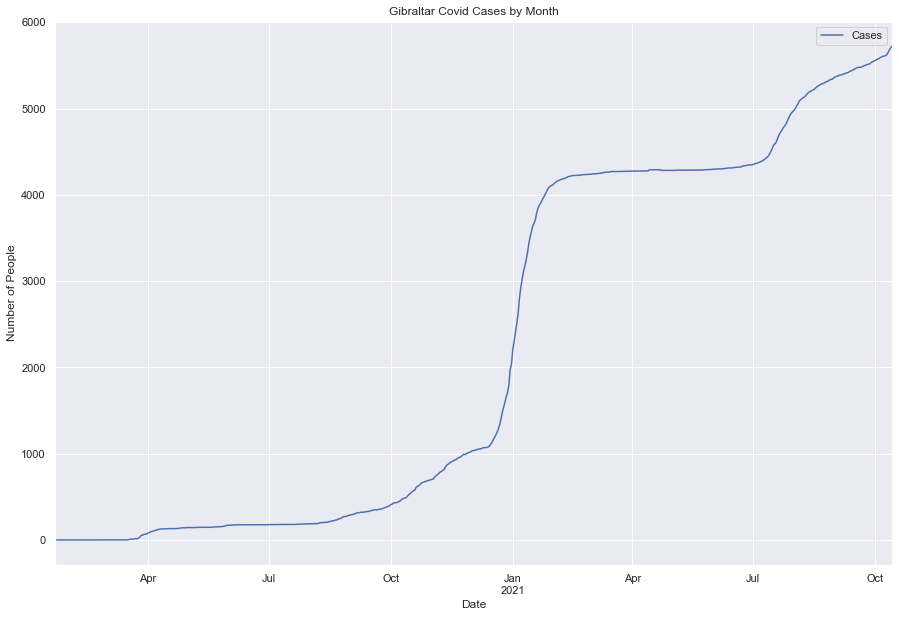

In [34]:
# Create Gilbraltar line plot to explore behavior over time
cov_gibraltar.plot('Date','Cases')
plt.title('Gibraltar Covid Cases by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar Covid Cases by Month')

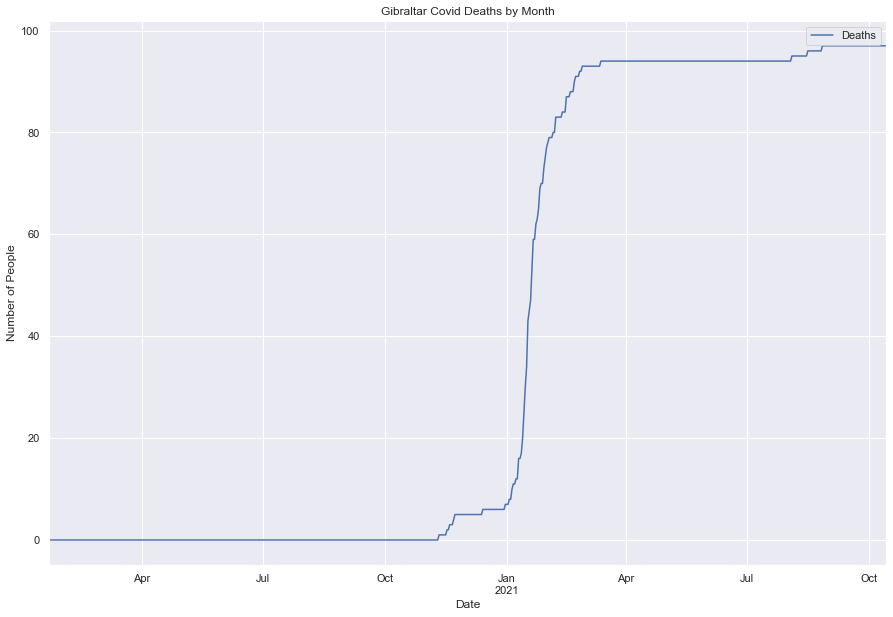

In [35]:
# Line plot of Deaths only to provide better view
cov_gibraltar.plot('Date', 'Deaths', label='Deaths')
plt.title('Gibraltar Covid Deaths by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar Covid Deaths by Month')

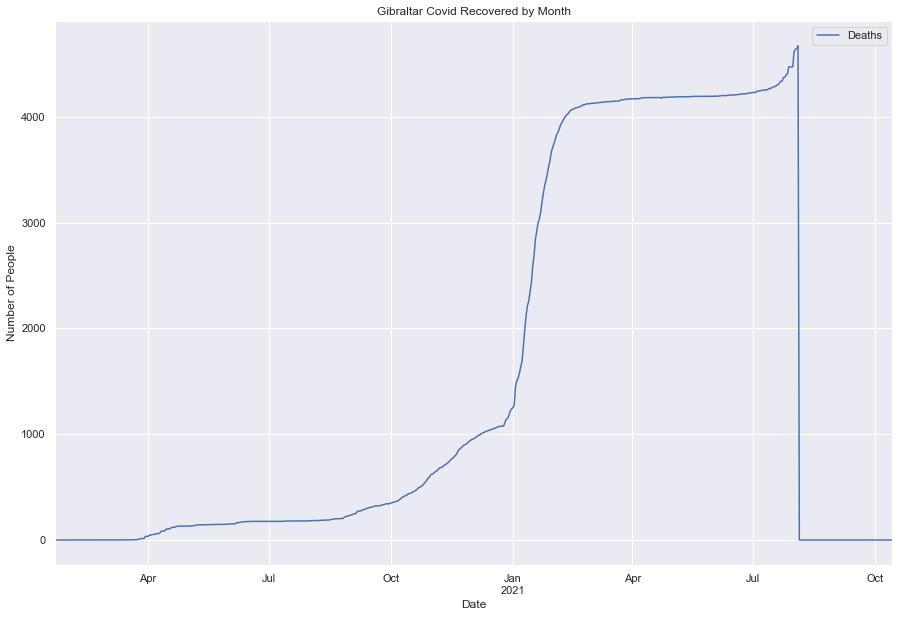

In [36]:
# Line plot of Deaths only to provide better view
cov_gibraltar.plot('Date', 'Recovered', label='Deaths')
plt.title('Gibraltar Covid Recovered by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar Covid Recovered by Month')

In [37]:
# Find which date recovered data begins missing
cov_gibraltar.groupby('Month')[['Recovered']].max()

,Recovered
Month,
2020-01-01,0
2020-02-01,0
2020-03-01,34
2020-04-01,131
2020-05-01,151
2020-06-01,176
2020-07-01,182
2020-08-01,237
2020-09-01,349


#### Gibraltar Covid Vaccination

According to the line plot, the vaccination variables are daily numbers because the general trend of vaccination numbers decreased after reaching peak around June or July. In fact, the population only began to receive vaccines in January 2021 where the numbers increased significantly and is consistently zero in year 2020.

From January to April 2021, the number of first dose were higher than that of second dose. After April daily numbers of second dose were consistantly higher than that of first dose because majority of population already received first dose and would require to receieve second dose. Moreover, daily numbers of vaccinated decreased after reaching peak because people may have started to receive boosters, therefore no longer qualify as the definition of 'vaccinated' which is receiving two doses only.

In [38]:
# Create covid vaccination DataFrame of Gibraltar
vac_gibraltar = vac_uk_clean[vac_uk_clean['Province/State'] == 'Gibraltar']

# View shape
print('\nNumber of rows and columns:\n')
vac_gibraltar.shape


Number of rows and columns:



(632, 6)

In [39]:
# Groupby month
vac_gibraltar_month = vac_gibraltar.groupby('Month')[['First Dose','Second Dose']].sum().reset_index()

# View DataFrame
vac_gibraltar_month

,Month,First Dose,Second Dose
0,2020-01-01,0,0
1,2020-02-01,0,0
2,2020-03-01,0,0
3,2020-04-01,0,0
4,2020-05-01,0,0
5,2020-06-01,0,0
6,2020-07-01,0,0
7,2020-08-01,0,0
8,2020-09-01,0,0
9,2020-10-01,0,0


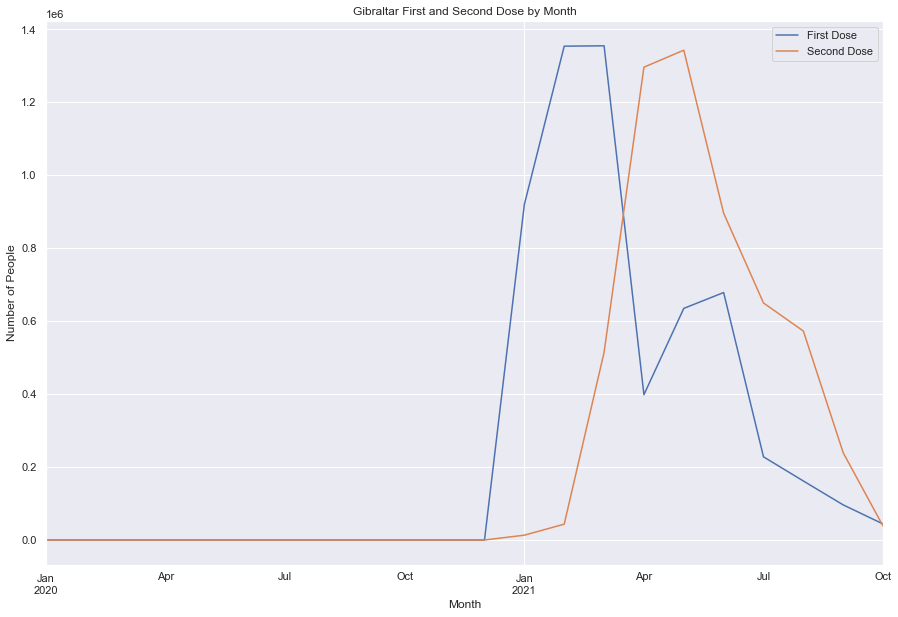

In [40]:
# Create Gilbraltar line plot to explore behavior over time
vac_gibraltar_month.plot('Month', ['First Dose','Second Dose'])
plt.title('Gibraltar First and Second Dose by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar First and Second Dose by Month')

In [41]:
# Groupby month
vac_gibraltar_month2 = vac_gibraltar.groupby('Month')[['Vaccinated']].sum().reset_index()

# View DataFrame
vac_gibraltar_month2

,Month,Vaccinated
0,2020-01-01,0
1,2020-02-01,0
2,2020-03-01,0
3,2020-04-01,0
4,2020-05-01,0
5,2020-06-01,0
6,2020-07-01,0
7,2020-08-01,0
8,2020-09-01,0
9,2020-10-01,0


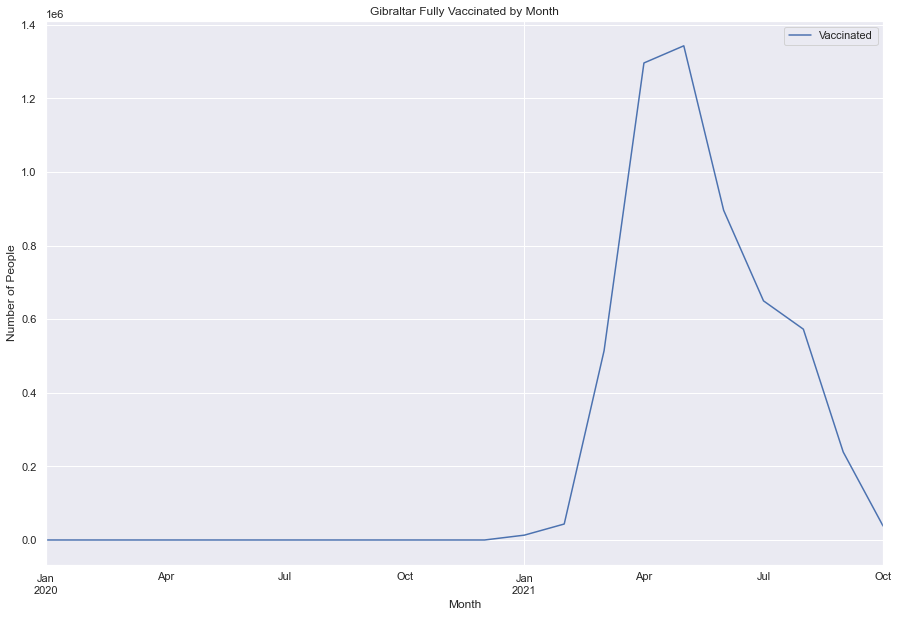

In [42]:
# Plot a line chart for vaccinated separately
vac_gibraltar_month2.plot('Month','Vaccinated')
plt.title('Gibraltar Fully Vaccinated by Month')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Gibraltar Fully Vaccinated by Month')

In [43]:
# Total number of people who are vaccinated, have received the first dose and have received the second dose
vac_gibraltar.groupby(by='Province/State')[['Vaccinated','First Dose','Second Dose']].sum()

,Vaccinated,First Dose,Second Dose
Province/State,,,
Gibraltar,5606041,5870786,5606041


### Aggregate data total by province and by month

Total number of cases, deaths, and recovered is aggregated with max() per province as data is cumulative. Hospitalised variable is excluded because it is not cumulative, therefore, sum() is used instead. The top province with highest number of cases are Others, Channel Islands and Isle of Man. The significantly large numbers in Others may correlate with the population size of the province.

As in the bar plot below, Gibraltar has the highest number of vaccination while Saint Helena, Ascension and Tristan da Cunha has the lowest number of vaccination. There is no data of the population, hence, unable to determine the ratio of vaccinated over total population to calculate percentage of population vaccinated to compare on the same basis as smaller islands may have smaller population. 

The trend of vaccination is similar across entire UK, where number for second dose exceeded first dose in around April 2022, the government only started to roll out vaccinations across all regions in January 2022 and vaccination numbers was the highest in March 2022.

In [44]:
# Total number cases for each province excluded Hospitalised because not cumulative
# max() is used because data is cumulative
cov_uk_province = cov_uk_clean.groupby('Province/State')[['Cases','Deaths','Recovered']].max()
cov_uk_province.sort_values(by='Cases',ascending=False)

,Cases,Deaths,Recovered
Province/State,,,
Others,8317439,138237,344
Channel Islands,12135,100,8322
Isle of Man,8343,54,4019
Gibraltar,5727,97,4670
Bermuda,5548,95,2503
Turks and Caicos Islands,2910,23,2433
British Virgin Islands,2725,37,1914
Cayman Islands,1011,2,635
Anguilla,644,1,111


In [45]:
# Total number of vaccination for each province 
# sum() is used because data is daily
vac_uk_province = vac_uk_clean.groupby('Province/State')[['Vaccinated', 'First Dose', 'Second Dose']].sum().round()\
.sort_values(by='Vaccinated',ascending=False)
vac_uk_province

,Vaccinated,First Dose,Second Dose
Province/State,,,
Gibraltar,5606041,5870786,5606041
Montserrat,5157560,5401128,5157560
British Virgin Islands,4933315,5166303,4933315
Anguilla,4709072,4931470,4709072
Isle of Man,4036345,4226984,4036345
Falkland Islands (Malvinas),3587869,3757307,3587869
Cayman Islands,3363624,3522476,3363624
Channel Islands,3139385,3287646,3139385
Turks and Caicos Islands,2915136,3052822,2915136


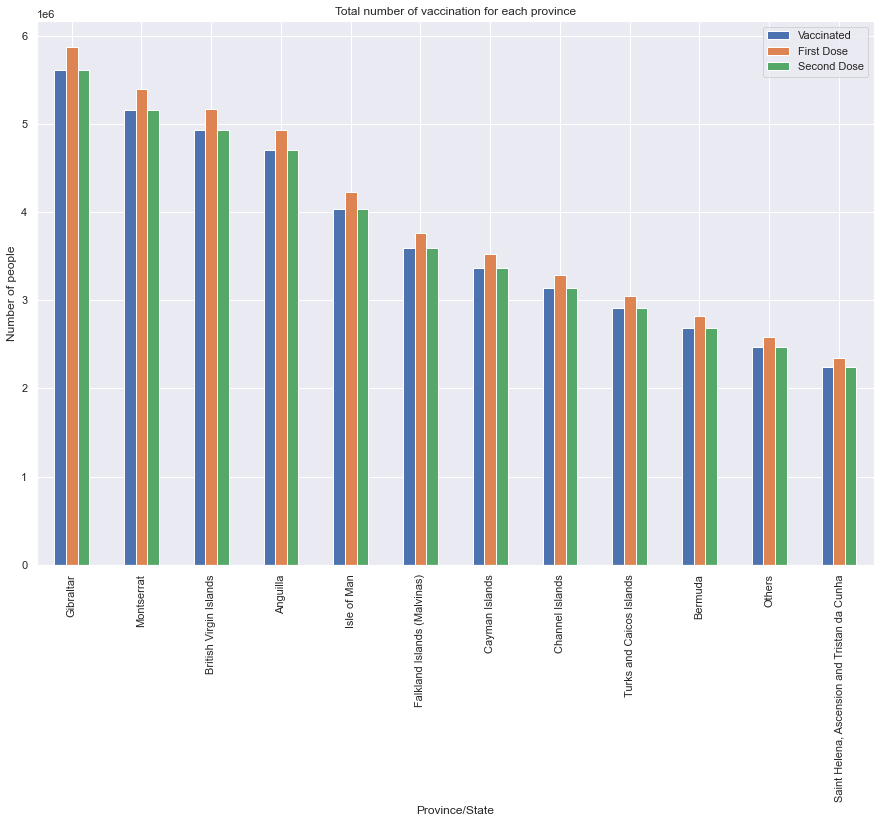

In [46]:
# Plot by province
vac_uk_province.plot.bar()
plt.title('Total number of vaccination for each province')
plt.ylabel('Number of people')

# Save and export figure
plt.savefig('Total number of vaccination for each province')

In [47]:
# Total vaccination number by month across UK
vac_uk_month = vac_uk_clean.groupby('Month')[['Vaccinated', 'First Dose', 'Second Dose']].sum()
vac_uk_month.sort_values(by='First Dose',ascending=False)

,Vaccinated,First Dose,Second Dose
Month,,,
2021-03-01,4114780,10839654,4114780
2021-02-01,347306,10831908,347306
2021-01-01,105394,7360139,105394
2021-06-01,7167974,5427834,7167974
2021-05-01,10743658,5080284,10743658
2021-04-01,10370745,3187116,10370745
2021-07-01,5198954,1824109,5198954
2021-08-01,4583146,1294373,4583146
2021-09-01,1912751,769678,1912751


Text(0.5, 1.0, 'Monthly Number of Vaccination Across UK')

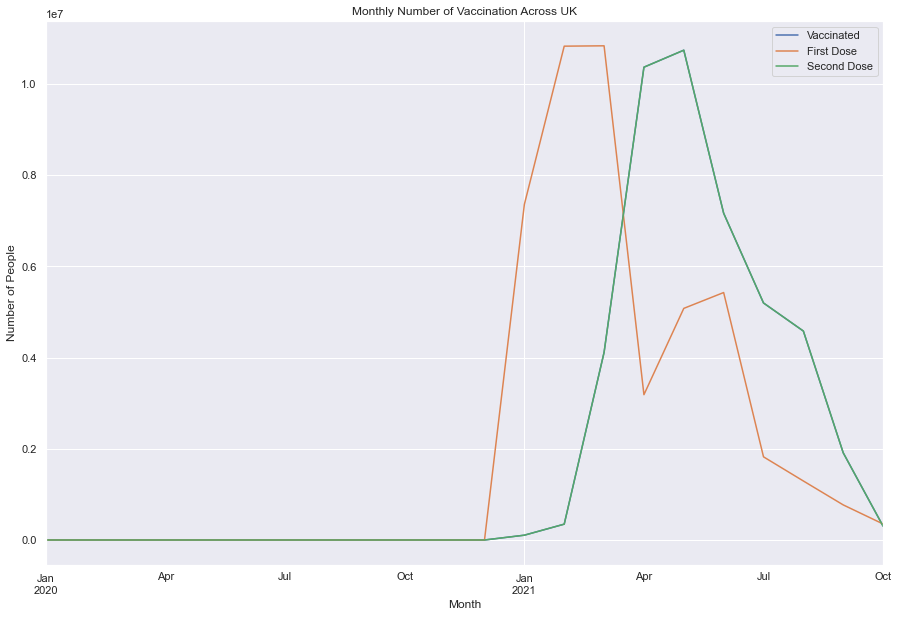

In [48]:
# Plot of total vaccination number by month across UK
vac_uk_month.plot.line()
plt.ylabel('Number of People')
plt.title('Monthly Number of Vaccination Across UK')

#### 2.2) Presentation expectations:
Use the process of exploring the data for Gibraltar as example to provide a brief description of the various phases to help your team to understand the process. Keep it high level and make sure to focus on both specifics relating to the case (first dose, second dose per region, total and over time) and brief observations regarding the process. Assignment two considers basic data exploration.
- Can we make decisions based on total numbers only, or do trends over time offer additional insights?
- Why it is important to explore the data, what are the typical mistakes made in this phase?

To explore the data, the dataframe was filtered to a specific region, Gilbraltor, as it would provide a more accurate view of the behavior. Then, the variables of interest were plot by month to understand whether the data is cumulative or daily before proceeding with aggregation. As a result, some variables like cases, deaths, and recovered were cumulative while first dose, second dose were daily numbers. This helped determine which functions max() for cumulative data and sum() for daily data to calculate the total per province and by month.

Trends over time offers additional insights as it is important to understand the pattern of the data. Some data are cumulative and some are daily, therefore, plotting the data in line chart to explore over time will provide a more accurate interpretation of the data before drawing conclusions.

In the initial phase, data should be explore from multiple perspectives to provide an objective understanding. Using two different categorical data including province and date to aggregate data. Then, explore from a high level overview using time series with visualisations such as line plot and bar plot to compare the differences of variables between provinces. From this, the variables can be determined as either cumulative or daily as the approach to aggregate the data would be different to calculate total. ie. sum() for daily variables and max() for cumulative variables.

## 3) Assignment activity 3: [Merge and analyse the data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-3-merge-and-analyse-the-data?module_item_id=20649)

### 3.1) Report:
The covid cases and vaccination DataFrame were merged on inner join to remove duplicate rows and duplicate columns were dropped. The merged DataFrame was then explored by ensuring all data types are correct, with date already converted in the previous section. The calculation of the number of individuals who only received first dose in each province was added to the DataFrame. This analysis will identify which top three province the government should target at for their marketing campaign to increase vaccination rate. The vaccinatio variables are plotted over time for interpretation.



**Instructions**
- Merge and explore the data
- Convert the data type of the Date column from object to datetime
- Create a dataset that meets the expected parameters
- Add calculated features to dataframes (difference between first and second dose vaccinations)
- Filter and sort output
- Observe totals and percentages as a total and over time
- Note observations

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised.

### Join the DataFrames as covid where you merge cov and vac 

In [49]:
# Merge on date and province/state
covid_uk = cov_uk_clean.merge(vac_uk_clean, on=['Date','Province/State'], how='inner')

# Clean up / drop unnecessary columns 
covid_uk.drop(list(covid_uk.filter(regex='_y$')), axis=1, inplace=True)

# Print shape of data
covid_uk.shape

(7584, 11)

### Explore the new DataFrame

In [50]:
# Info of new DataFrame
# datatype of date is already fixed as DateTime
covid_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  7584 non-null   object        
 1   Country/Region  7584 non-null   object        
 2   Date            7584 non-null   datetime64[ns]
 3   Month_x         7584 non-null   datetime64[ns]
 4   Deaths          7584 non-null   int64         
 5   Cases           7584 non-null   int64         
 6   Recovered       7584 non-null   int64         
 7   Hospitalised    7584 non-null   int64         
 8   Vaccinated      7584 non-null   int64         
 9   First Dose      7584 non-null   int64         
 10  Second Dose     7584 non-null   int64         
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 711.0+ KB


Datatype of date column is fixed as in section 1.

In [51]:
# Descriptive statistics of new DataFrame
covid_uk.describe().round()

,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
count,7584.0,7584.0,7584.0,7584.0,7584.0,7584.0,7584.0
mean,6209.0,214652.0,455.0,685.0,5914.0,6193.0,5914.0
std,24858.0,1007430.0,1011.0,819.0,10846.0,11440.0,10846.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,12.0,0.0,105.0,0.0,0.0,0.0
50%,1.0,168.0,13.0,390.0,0.0,0.0,0.0
75%,25.0,1585.0,312.0,955.0,8338.0,7506.0,8338.0
max,138237.0,8317439.0,8322.0,4907.0,69619.0,94038.0,69619.0


In [52]:
# View merged DataFrame
covid_uk.head()

,Province/State,Country/Region,Date,Month_x,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,2020-01-22,2020-01-01,0,0,0,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,2020-01-01,0,0,0,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,2020-01-01,0,0,0,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,2020-01-01,0,0,0,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,2020-01-01,0,0,0,0,0,0,0


### Groupby and calculate difference between first and second dose
Formula: First Dose Only = First Dose - Second Dose

In [53]:
# Calculate first dose only column
covid_uk['First Dose Only'] = covid_uk['First Dose'] - covid_uk['Second Dose']
covid_uk

,Province/State,Country/Region,Date,Month_x,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,First Dose Only
0,Anguilla,United Kingdom,2020-01-22,2020-01-01,0,0,0,0,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,2020-01-01,0,0,0,0,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,2020-01-01,0,0,0,0,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,2020-01-01,0,0,0,0,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,2020-01-01,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,2021-10-10,2021-10-01,137735,8154306,0,378,1070,1216,1070,146
7580,Others,United Kingdom,2021-10-11,2021-10-01,137763,8193769,0,386,1300,1604,1300,304
7581,Others,United Kingdom,2021-10-12,2021-10-01,137944,8231437,0,386,1482,2027,1482,545
7582,Others,United Kingdom,2021-10-13,2021-10-01,138080,8272883,0,0,0,0,0,0


### Province with largest number of people who received only first dose

As shown in the bar plot, Gibraltar, Montserrat, British Virgin Islands should be focused in the marketing campaign because these are the top three province with the highest number of people who only received the first dose but not second dose. However, in terms of percentage, all provinces have similar 4.7% population of people who received first dose only. This may be due to the fact that the vaccination program was similar and implemented at the same time across all provinces as they are all part of United Kingdom.

In [54]:
# Calculation number of individuals who received first dose only
# Sum() is used as data represents daily numbers
covid_uk_province = covid_uk.groupby('Province/State')[['Vaccinated','First Dose', 'Second Dose', 'First Dose Only']].sum()
covid_uk_province.sort_values(by='First Dose Only', ascending=False)

,Vaccinated,First Dose,Second Dose,First Dose Only
Province/State,,,,
Gibraltar,5606041,5870786,5606041,264745
Montserrat,5157560,5401128,5157560,243568
British Virgin Islands,4933315,5166303,4933315,232988
Anguilla,4709072,4931470,4709072,222398
Isle of Man,4036345,4226984,4036345,190639
Falkland Islands (Malvinas),3587869,3757307,3587869,169438
Cayman Islands,3363624,3522476,3363624,158852
Channel Islands,3139385,3287646,3139385,148261
Turks and Caicos Islands,2915136,3052822,2915136,137686


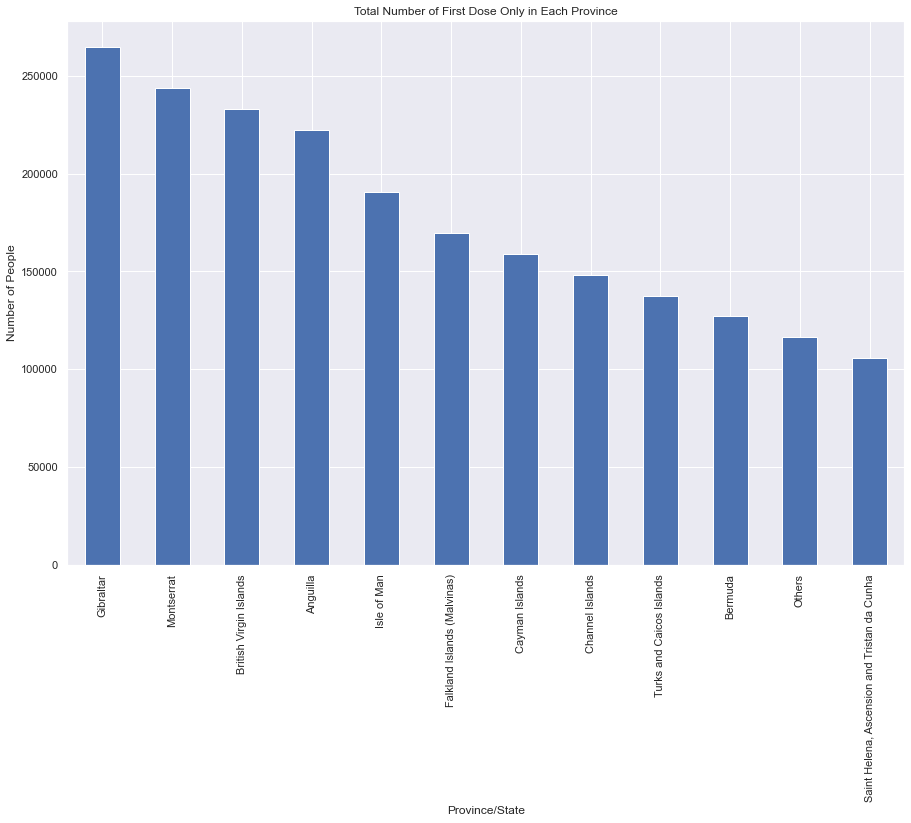

In [55]:
# Plot province with highest number of people who received first dose only
first_only = covid_uk_province['First Dose Only'].sort_values(ascending=False)
first_only.plot.bar()
plt.title('Total Number of First Dose Only in Each Province')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Total Number of First Dose Only in Each Province')

In [56]:
# Calculate percentage of individuals who received first dose only
covid_uk_province['First Dose Only %'] = covid_uk_province['First Dose Only']/covid_uk_province['Second Dose']*100
covid_uk_province['Second Dose %'] = 100 - covid_uk_province['First Dose Only %']
covid_uk_province.sort_values(by='First Dose Only %', ascending=False)

,Vaccinated,First Dose,Second Dose,First Dose Only,First Dose Only %,Second Dose %
Province/State,,,,,,
Turks and Caicos Islands,2915136,3052822,2915136,137686,4.723142,95.276858
Isle of Man,4036345,4226984,4036345,190639,4.723060,95.276940
Anguilla,4709072,4931470,4709072,222398,4.722756,95.277244
British Virgin Islands,4933315,5166303,4933315,232988,4.722747,95.277253
Cayman Islands,3363624,3522476,3363624,158852,4.722644,95.277356
Channel Islands,3139385,3287646,3139385,148261,4.722613,95.277387
Montserrat,5157560,5401128,5157560,243568,4.722543,95.277457
Falkland Islands (Malvinas),3587869,3757307,3587869,169438,4.722525,95.277475
Gibraltar,5606041,5870786,5606041,264745,4.722495,95.277505


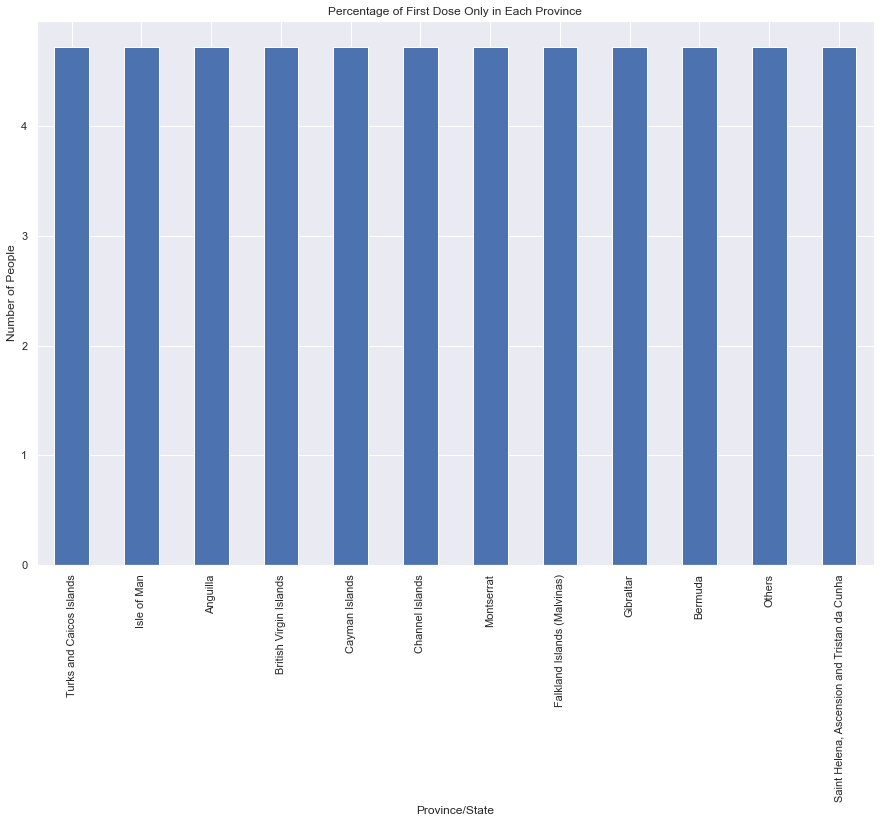

In [57]:
first_only_per = covid_uk_province['First Dose Only %'].sort_values(ascending=False)

# Plot bar graph
first_only_per.plot.bar()
plt.title('Percentage of First Dose Only in Each Province')
plt.ylabel('Number of People')

# Save and export figure
plt.savefig('Percentage of First Dose Only in Each Province')

### Groupby and calculate difference between first and second dose over time

Across all regions in the UK, the number of individuals who received first dose reached its peak in March, then in April the number of individuals who received second exceeded that of first dose. Since majority of the population has already has the first dose, there is a significant drop in daily number of people who are receiving first dose. Therefore, when calculating the first dose only, there is a negative behaviour in April 2021 because the number of second dose is greater than number of first dose.

In [58]:
# Groupby month to view line plot over time
covid_uk_month = covid_uk.groupby('Month_x')[['Vaccinated','First Dose','Second Dose','First Dose Only']].sum()
covid_uk_month.sort_values(by='First Dose',ascending=False)

,Vaccinated,First Dose,Second Dose,First Dose Only
Month_x,,,,
2021-03-01,4114780,10839654,4114780,6724874
2021-02-01,347306,10831908,347306,10484602
2021-01-01,105394,7360139,105394,7254745
2021-06-01,7167974,5427834,7167974,-1740140
2021-05-01,10743658,5080284,10743658,-5663374
2021-04-01,10370745,3187116,10370745,-7183629
2021-07-01,5198954,1824109,5198954,-3374845
2021-08-01,4583146,1294373,4583146,-3288773
2021-09-01,1912751,769678,1912751,-1143073


Text(0.5, 0, 'Month')

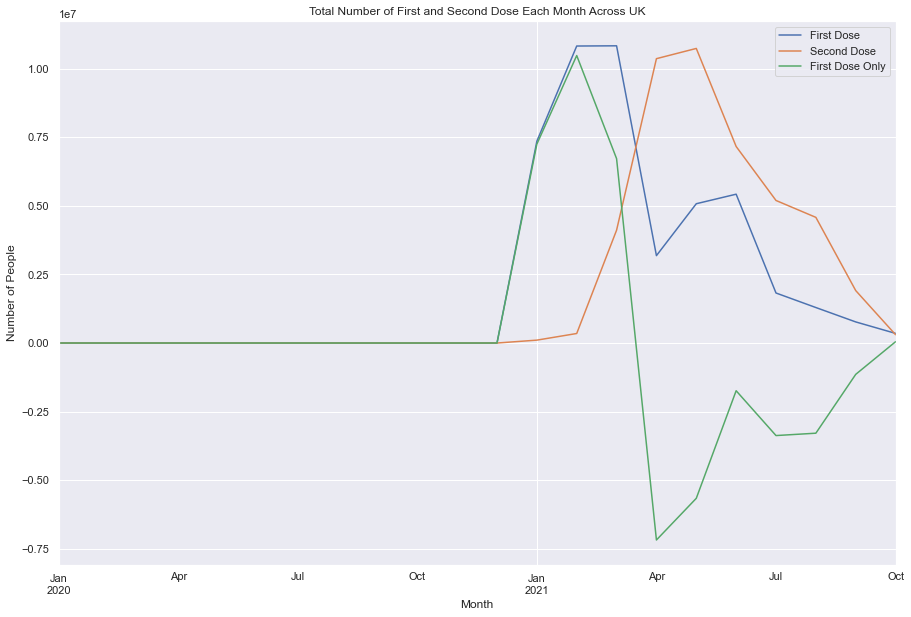

In [59]:
# Create line plot for first dose and second dose
covid_uk_month[['First Dose','Second Dose', 'First Dose Only']].plot()
plt.title('Total Number of First and Second Dose Each Month Across UK')
plt.ylabel('Number of People')
plt.xlabel('Month')

#### 3.2) Presentation expectations:
We use similar calculations and representations as we had in activity 2, but now expand to look at all provinces. Assignment 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in assignment 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
As shown in the bar plot, Gibraltar, Montserrat, British Virgin Islands in their marketing campaign because these are the top three province with the highest number of people who only received the first dose but not second dose. However, in terms of percentage, all province has similar percentage of Second Dose population who are eligible to receive second dose which is 4.7%. This may be due to the fact that the vaccination program and policy were implemented at the same time across all provinces as they are all part of United Kingdom.

- Are there limitations or assumptions that needs to be considered?
The limitations to identifying the top 3 province with highest number of first dose only is that their population was not taken into account. If Gilbraltar had a larger population than Saint Helena Ascension and Tristan da Cunha, it is natural that their number is higher. Also, the metadata was not clear on whether the number of vaccination is only limited to the residents or includes visitors as well.

- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis
Other variables including cases, deaths, recoveries can be explored whether increased number of vaccination has impacted or decreased the number of cases or deaths and increased recoveries.

### 4) Assignment activity 4: [Visualise and identify initial trends](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-4-visualise-and-identify-initial-trends?module_item_id=21381)

**Instructions**

The government is looking to promote second dose vaccinations and looking for the first area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)
- Visualise both outputs.

#### 4.1) Report expectations:
- Consider additional features (deaths and recoveries)
- Visualise the data
- Note observations
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

### Absolute numbers & sort and display

According to the absolute totals calculated for each province, Gibraltar has the highest number of people who  recevied first dose only and is eligible to receive second dose. Then, Montserrat and British Virgin Islands follows. Therefore, the government should target their first marketing campaign at the top these top three provinces with at least 230,000 people or above eligible for second dose.

In [60]:
# Where should the government target?
abs_province = covid_uk_province.sort_values(by='First Dose Only', ascending=False).reset_index()
abs_province

,Province/State,Vaccinated,First Dose,Second Dose,First Dose Only,First Dose Only %,Second Dose %
0,Gibraltar,5606041,5870786,5606041,264745,4.722495,95.277505
1,Montserrat,5157560,5401128,5157560,243568,4.722543,95.277457
2,British Virgin Islands,4933315,5166303,4933315,232988,4.722747,95.277253
3,Anguilla,4709072,4931470,4709072,222398,4.722756,95.277244
4,Isle of Man,4036345,4226984,4036345,190639,4.723060,95.276940
5,Falkland Islands (Malvinas),3587869,3757307,3587869,169438,4.722525,95.277475
6,Cayman Islands,3363624,3522476,3363624,158852,4.722644,95.277356
7,Channel Islands,3139385,3287646,3139385,148261,4.722613,95.277387
8,Turks and Caicos Islands,2915136,3052822,2915136,137686,4.723142,95.276858
9,Bermuda,2690908,2817981,2690908,127073,4.722309,95.277691


Text(0.5, 1.0, 'Number of First Dose Only in Each Province')

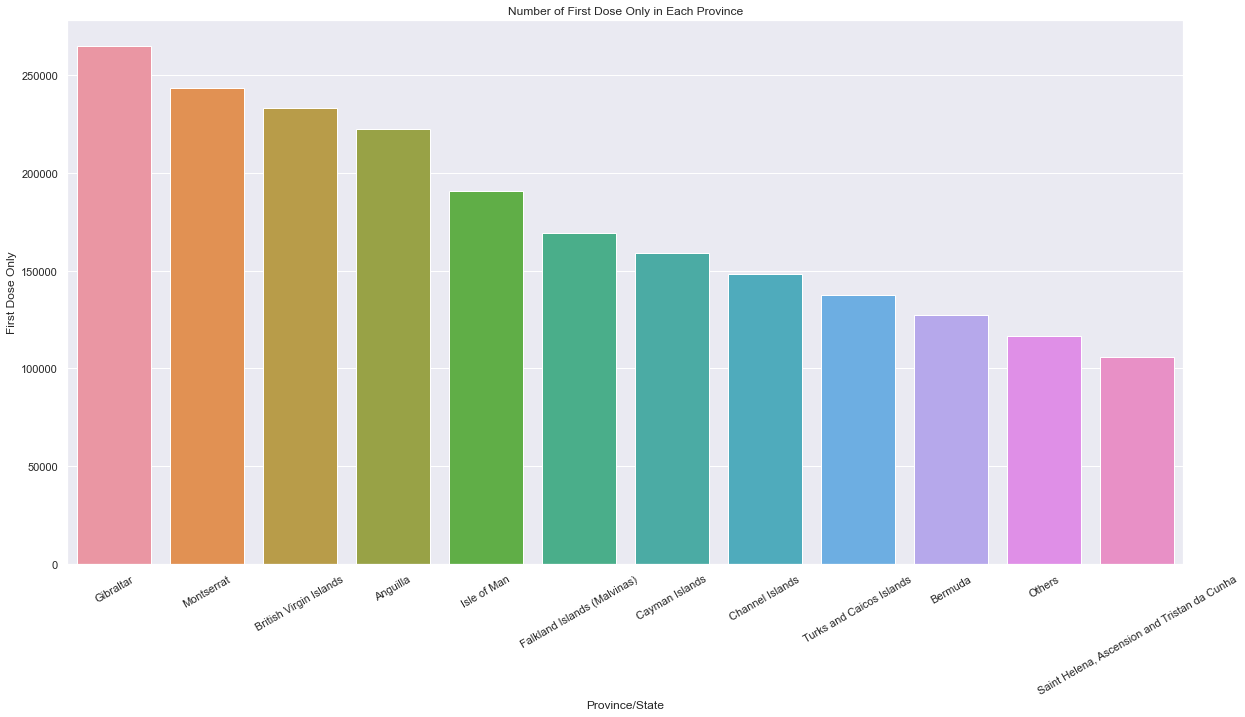

In [61]:
# Absolute numbers visualisation - Number of First Dose Only per province
# create a grouped barplot
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x='Province/State', y='First Dose Only', data=abs_province)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Number of First Dose Only in Each Province')

### Relative numbers (%) Sort and Display

However, according to the percentage of the population who had already at least first dose, Turks and Caicos Islands	 has the highest percentage of the first dose population who is eligible to receive second dose. 

All percentage of first dose only are relatively similar as the vaccination strategy may be the same throughout the provinces as they are all part of the united kingdom, resulting in very similar vaccination rate. The differences is evident in the decimal places as the number of vaccinated population is large with 5 to 6 digit numbers.

In [62]:
# Where should the government target?
rel_province = covid_uk_province.sort_values(by='First Dose Only %', ascending=False).reset_index()
rel_province

,Province/State,Vaccinated,First Dose,Second Dose,First Dose Only,First Dose Only %,Second Dose %
0,Turks and Caicos Islands,2915136,3052822,2915136,137686,4.723142,95.276858
1,Isle of Man,4036345,4226984,4036345,190639,4.723060,95.276940
2,Anguilla,4709072,4931470,4709072,222398,4.722756,95.277244
3,British Virgin Islands,4933315,5166303,4933315,232988,4.722747,95.277253
4,Cayman Islands,3363624,3522476,3363624,158852,4.722644,95.277356
5,Channel Islands,3139385,3287646,3139385,148261,4.722613,95.277387
6,Montserrat,5157560,5401128,5157560,243568,4.722543,95.277457
7,Falkland Islands (Malvinas),3587869,3757307,3587869,169438,4.722525,95.277475
8,Gibraltar,5606041,5870786,5606041,264745,4.722495,95.277505
9,Bermuda,2690908,2817981,2690908,127073,4.722309,95.277691


### Visualise

### Let's smooth out the data by looking at monthly figures

The following analysis will focus on the specific region Gibraltar the campaign will be first targeted in this province with highest number of eligible people for second dose.
On a monthly basis, the vaccination trend is the same as that of entire UK, where first dose reach its peak in March and intersected with second dose in April as majority are eligible to receive second dose.

In [63]:
# Filter Gilbraltar
Gibraltar_only = covid_uk[covid_uk['Province/State'] == 'Gibraltar']

# Make a copy
Gibraltar_covid = Gibraltar_only.copy()

# Convert Date to Month
Gibraltar_covid['Month'] = pd.to_datetime(Gibraltar_covid['Date']+pd.offsets.MonthBegin(-1))

# Aggregate by month
Gibraltar_month = Gibraltar_covid.groupby('Month')[['Vaccinated', 'First Dose','Second Dose', 'First Dose Only']].sum()

# View DataFrame
Gibraltar_month

,Vaccinated,First Dose,Second Dose,First Dose Only
Month,,,,
2020-01-01,0,0,0,0
2020-02-01,0,0,0,0
2020-03-01,0,0,0,0
2020-04-01,0,0,0,0
2020-05-01,0,0,0,0
2020-06-01,0,0,0,0
2020-07-01,0,0,0,0
2020-08-01,0,0,0,0
2020-09-01,0,0,0,0


Text(0.5, 0, 'Month')

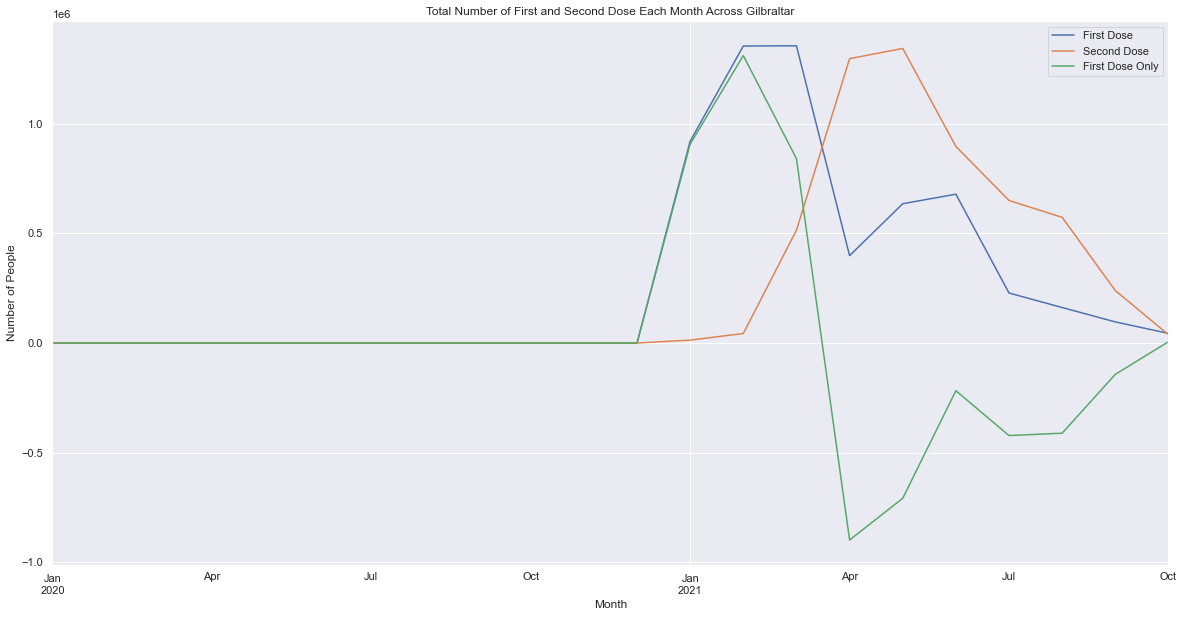

In [64]:
# Plot over month
Gibraltar_month[['First Dose','Second Dose', 'First Dose Only']].plot()
plt.title('Total Number of First and Second Dose Each Month Across Gilbraltar')
plt.ylabel('Number of People')
plt.xlabel('Month')

In [65]:
# Filter Saint Helena, Ascension and Tristan da Cunha
SH_only = covid_uk[covid_uk['Province/State'] == 'Saint Helena, Ascension and Tristan da Cunha']

# Make a copy
SH_covid = SH_only.copy()

# Convert Date to Month
SH_covid['Month'] = pd.to_datetime(SH_covid['Date']+pd.offsets.MonthBegin(-1))

# Aggregate by month
SH_month = SH_covid.groupby('Month')[['Vaccinated', 'First Dose','Second Dose', 'First Dose Only']].sum()

# View DataFrame
SH_month

,Vaccinated,First Dose,Second Dose,First Dose Only
Month,,,,
2020-01-01,0,0,0,0
2020-02-01,0,0,0,0
2020-03-01,0,0,0,0
2020-04-01,0,0,0,0
2020-05-01,0,0,0,0
2020-06-01,0,0,0,0
2020-07-01,0,0,0,0
2020-08-01,0,0,0,0
2020-09-01,0,0,0,0


Text(0.5, 0, 'Month')

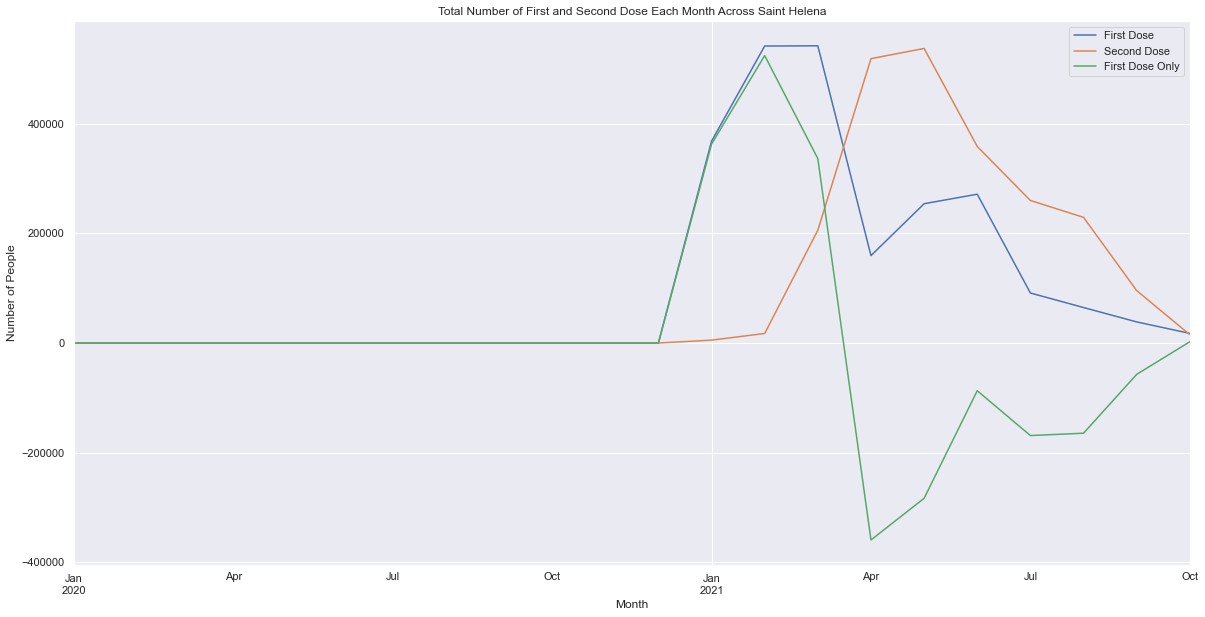

In [66]:
# Plot over month
SH_month[['First Dose','Second Dose', 'First Dose Only']].plot()
plt.title('Total Number of First and Second Dose Each Month Across Saint Helena')
plt.ylabel('Number of People')
plt.xlabel('Month')

### Recoveries

Channel Islands has the greatest number of recoveries, then followed by Gibraltar. The government can consider omitting this Channel Islands in initial campaign runs to invest resources in other provinces of priority to increase vaccination rate.

In [67]:
# Group recoveries by province
recovered_uk = covid_uk.groupby(['Province/State'])[['Recovered',]].max().reset_index().sort_values(by='Recovered',ascending=False)

# View DataFrame
recovered_uk

,Province/State,Recovered
4,Channel Islands,8322
6,Gibraltar,4670
7,Isle of Man,4019
1,Bermuda,2503
11,Turks and Caicos Islands,2433
2,British Virgin Islands,1914
3,Cayman Islands,635
9,Others,344
0,Anguilla,111
5,Falkland Islands (Malvinas),63



When plotted over each month, there is a significant increase in recoveries in January 2021 which is also when the vaccination numbers significantly increased in Gilbraltar. Then, it stablised throughout, with a slight increase in July. This implies that increase in vaccination has lead to an increase in recoveries. The government can utilise this data to support their marketing campaign and encourage people to get vaccinated.

In [68]:
# Recoveries over time
# Filter Gilbraltar
gib_only_rec = covid_uk[covid_uk['Province/State'] == 'Gibraltar']

# Make a copy
gib_rec = gib_only_rec.copy()

# Convert Date to Month
gib_rec['Month'] = pd.to_datetime(gib_rec['Date']+pd.offsets.MonthBegin(-1))

# Group by month
recovered_gib = gib_rec.groupby(['Month'])[['Recovered']].max().sort_values(by='Recovered',ascending=False)

# View DataFrame
recovered_gib

,Recovered
Month,
2021-08-01,4670
2021-07-01,4614
2021-06-01,4229
2021-05-01,4193
2021-04-01,4186
2021-03-01,4169
2021-02-01,4125
2021-01-01,3745
2020-12-01,1249


Text(0.5, 0, 'Month')

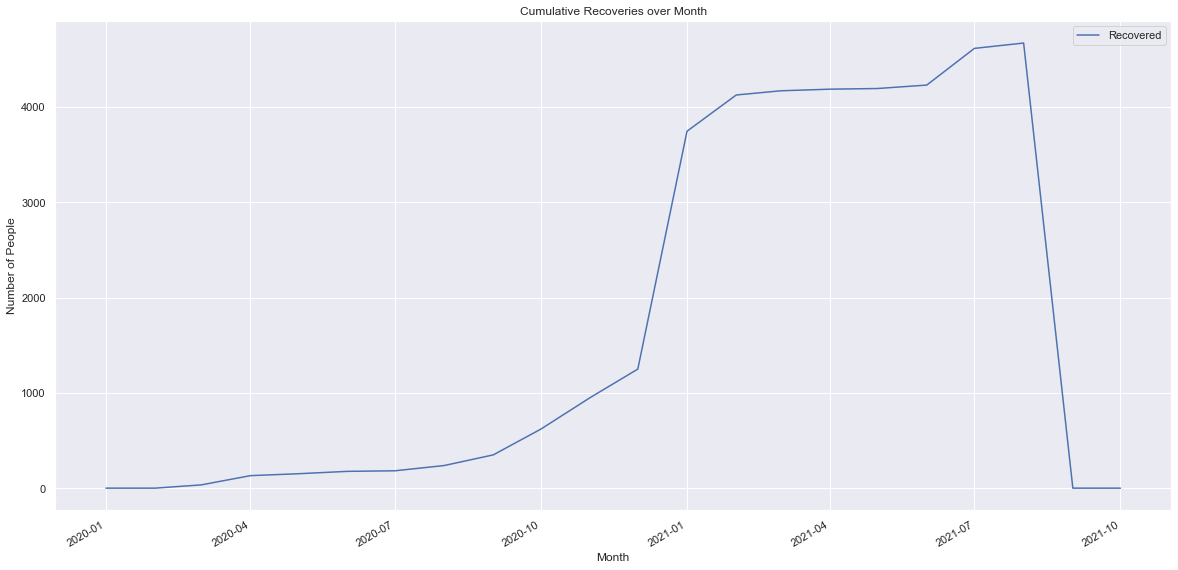

In [69]:
# Plot recoveries over month
recovered_gib.plot()
plt.title('Cumulative Recoveries over Month')
plt.ylabel('Number of People')
plt.xlabel('Month')

### Deaths

Gibraltar ranks the third with highest number of deaths. However, considering the Others province with highest number of deaths is 1000 times more than the second province Channels Island, number of deaths is relatively low. This may also be due to different population size. 

In [70]:
# Group recoveries by province
uk_deaths_province = covid_uk.groupby(['Province/State'])[['Deaths','Cases']].max().reset_index().sort_values(by='Deaths',ascending=False)

# Calculate death rate
uk_deaths_province['Death Rate %'] = uk_deaths_province['Deaths']/uk_deaths_province['Cases']*100

# View DataFrame and sort by death rate
uk_deaths_province.round(2).sort_values(by='Deaths', ascending=False)

,Province/State,Deaths,Cases,Death Rate %
9,Others,138237,8317439,1.66
4,Channel Islands,100,12135,0.82
6,Gibraltar,97,5727,1.69
1,Bermuda,95,5548,1.71
7,Isle of Man,54,8343,0.65
2,British Virgin Islands,37,2725,1.36
11,Turks and Caicos Islands,23,2910,0.79
3,Cayman Islands,2,1011,0.20
0,Anguilla,1,644,0.16
8,Montserrat,1,41,2.44


As in the graph below, the daily number of deaths of top three regions significantly decreased after the rollout of vaccination in January 2021 when number of vaccination was the highest as the line flattened beginning in February. This implies that the vaccine may have an positive impact in reducing number of deaths. The government can take into consideration in future marketing campaign to minimise death rates.

In [71]:
# Aggregate deaths by province and month
uk_deaths = covid_uk.groupby(['Province/State','Month_x'])[['Deaths','Cases']].max().reset_index()

uk_deaths

,Province/State,Month_x,Deaths,Cases
0,Anguilla,2020-01-01,0,0
1,Anguilla,2020-02-01,0,0
2,Anguilla,2020-03-01,0,2
3,Anguilla,2020-04-01,0,3
4,Anguilla,2020-05-01,0,3
...,...,...,...,...
259,Turks and Caicos Islands,2021-06-01,18,2425
260,Turks and Caicos Islands,2021-07-01,18,2486
261,Turks and Caicos Islands,2021-08-01,20,2653
262,Turks and Caicos Islands,2021-09-01,23,2854


Text(0.5, 1.0, 'Number of Deaths Each Month')

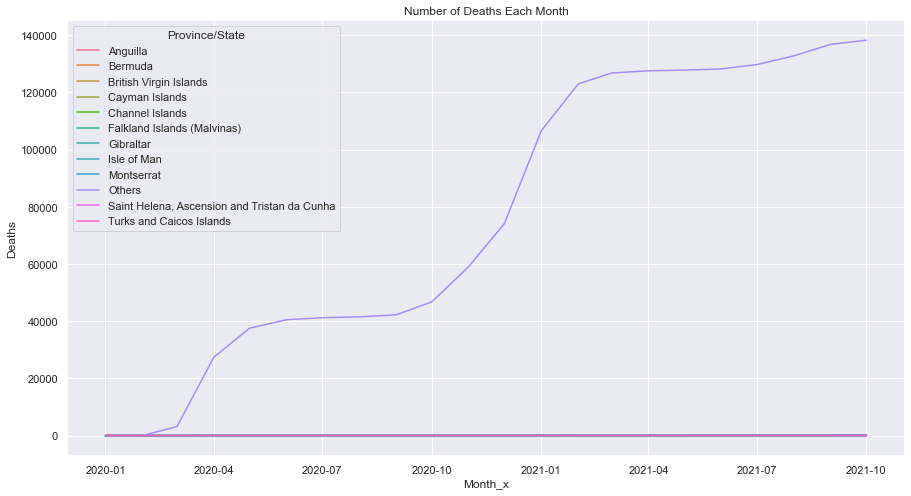

In [72]:
# Plot deaths of each province over time
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Month_x', y='Deaths',hue='Province/State', data=uk_deaths).set_title('Number of Deaths Each Month')

Others province is causing skewed data, thereofore, it is excluded and replotted below.

In [73]:
# Exclude Others which skewed data
uk_deaths_excluded = uk_deaths[uk_deaths['Province/State'] != 'Others']

uk_deaths_excluded.shape

(242, 4)

Text(0.5, 1.0, 'Number of Deaths Each Month')

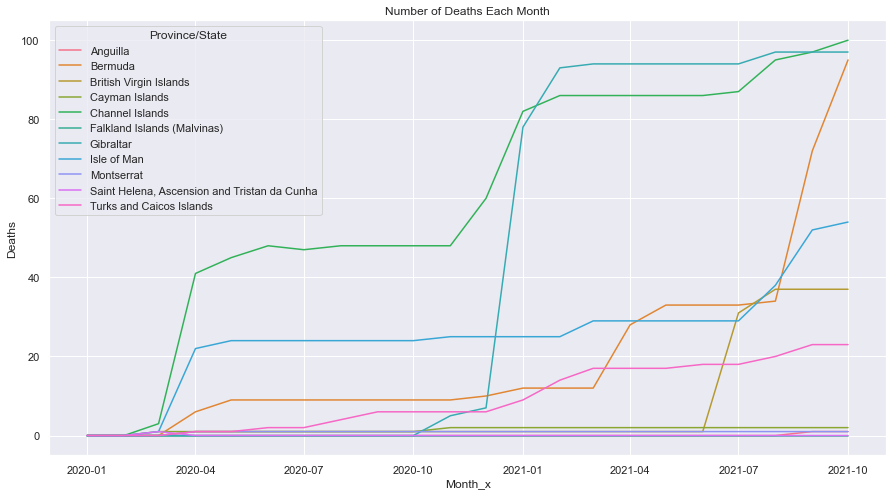

In [74]:
# Plot deaths of each province over time excluding Others
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Month_x', y='Deaths',hue='Province/State', data=uk_deaths_excluded).set_title('Number of Deaths Each Month')

In [75]:
# Plot Channel Islands and Gilbralar only
uk_deaths_cluster = uk_deaths[uk_deaths['Province/State'].isin(['Gibraltar', 'Channel Islands'])]

# View DataFrame
uk_deaths_cluster.groupby(['Province/State','Month_x'])[['Deaths']].sum()

Deaths
Province/State  Month_x           
Channel Islands 2020-01-01       0
                2020-02-01       0
                2020-03-01       3
                2020-04-01      41
                2020-05-01      45
                2020-06-01      48
                2020-07-01      47
                2020-08-01      48
                2020-09-01      48
                2020-10-01      48
                2020-11-01      48
                2020-12-01      60
                2021-01-01      82
                2021-02-01      86
                2021-03-01      86
                2021-04-01      86
                2021-05-01      86
                2021-06-01      86
                2021-07-01      87
                2021-08-01      95
                2021-09-01      97
                2021-10-01     100
Gibraltar       2020-01-01       0
                2020-02-01       0
                2020-03-01       0
                2020-04-01       0
                2020-05-01       0
                2020-06-01       0
                2020-07-01       0
                2020-08-01       0
                2020-09-01       0
                2020-10-01       0
                2020-11-01       5
                2020-12-01       7
                2021-01-01      78
                2021-02-01      93
                2021-03-01      94
                2021-04-01      94
                2021-05-01      94
                2021-06-01      94
                2021-07-01      94
                2021-08-01      97
                2021-09-01      97
                2021-10-01      97

[Text(0.5, 1.0, 'Gibraltar and Channel Islands Number of Deaths Each Month')]

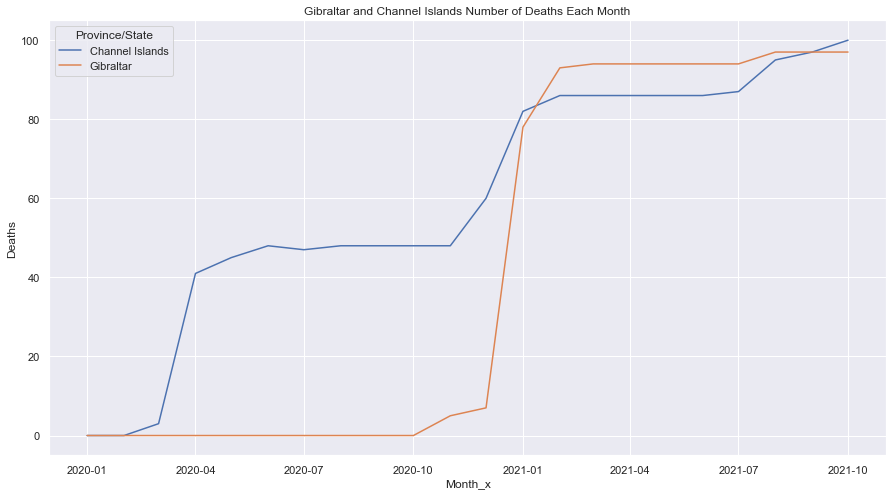

In [76]:
# Plot deaths of each province over time
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Month_x', y='Deaths',hue='Province/State', data=uk_deaths_cluster)\
.set(title='Gibraltar and Channel Islands Number of Deaths Each Month')

It is important to analyse data from multiple perspectives because it will discover other factors that may impact the result and ensure a holistic view is provided for stakeholders to make the best decision and avoid biased views.

#### 4.2) Presentation expectations:
**Instructions**

- What insights can be gained from the data?
- Why do we need to consider other features?
- **Note**: Different features evaluated to improve decision making (deaths and recoveries); why it is important to explore data and use different views; Highlight two or three suggestions to get junior team members started in terms of good practices

***Examples could include:***
- Are there other trends in terms of recoveries or hospitalisations compared to other features that you found interesting and that may add value in terms of the decision making process?
- Any other observations regarding the data?
- Any suggestions for improvements and further analysis?
- What would your future data requirements be?

According to the absolute totals calculated for each province, Gibraltar has the highest number of people who  recevied first dose only and is eligible to receive second dose. Then, Montserrat and British Virgin Islands follows. Therefore, the government should target their first marketing campaign at the top these top three provinces with at least 230,000 people or above eligible for second dose.

The vaccine has a positive impact on reducing deaths and increasing recoveries. This can be used as supporting data to include educational information in the campaign.

For further analysis, it would be good to include the daily number of cases to visualise its correlation with the number of vaccinated for each province.Data on each province resident population would be required in the future to identify the province with lowest percentage of fully vaccinated residents for further marketing campaign.

## 5) Assignment activity 5: External data: [Analyse the Twitter data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-5-analyse-the-twitter-data?module_item_id=21383)
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional #tags or keywords that could potentially provide insights into your covid analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar datasets to provide richer insights.

**Instructions**
- Demonstrate basic ability to work with Twitter data
- Search for hash-tags or keywords
- Create dataframes and visualisations
- Note observations

### 5.1) Report:

The number of hashtags related to covid in the 100 tweets in the period March 18 to 21, 2022 was analysed. The tweets dataset was explored by identifying variables of interest including text of entire tweet, then extracting all hashtags and append into a list with a loop. Out of the top 10 hashtags used in the tweets, top 4 of them were releated to covid.

In [77]:
# Import the tweet dataset (`tweets_2.csv`)
tweets_2 = pd.read_csv(dir + '/tweets_2.csv')

In [78]:
# Explore the data: info(), head()
tweets_2.shape

(100, 29)

In [79]:
# View DataFrame information including data types
tweets_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 100 non-null    object 
 1   id                         100 non-null    int64  
 2   id_str                     100 non-null    int64  
 3   text                       100 non-null    object 
 4   truncated                  100 non-null    bool   
 5   entities                   100 non-null    object 
 6   metadata                   100 non-null    object 
 7   source                     100 non-null    object 
 8   in_reply_to_status_id      8 non-null      float64
 9   in_reply_to_status_id_str  8 non-null      float64
 10  in_reply_to_user_id        11 non-null     float64
 11  in_reply_to_user_id_str    11 non-null     float64
 12  in_reply_to_screen_name    11 non-null     object 
 13  user                       100 non-null    object 


In [80]:
# View DataFrame
tweets_2.tail()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
95,Fri Mar 18 11:43:35 +0000 2022,1504785582656008202,1504785582656008202,#CovidIsNotOver #COVID19 #coronavirus #Omicron...,True,"{'hashtags': [{'text': 'CovidIsNotOver', 'indi...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1,0,False,False,und,False,1.504715e+18,1.504715e+18,{'created_at': 'Fri Mar 18 07:03:00 +0000 2022...,NaN
96,Fri Mar 18 11:32:16 +0000 2022,1504782734924918830,1504782734924918830,"The sun is shining. The doors are open, it’s n...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
97,Fri Mar 18 11:31:50 +0000 2022,1504782625491333123,1504782625491333123,@joeldommett @ZoeTheBall @kylieminogue so all...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
98,Fri Mar 18 11:20:59 +0000 2022,1504779896786243585,1504779896786243585,#COVID19 was mentioned on the death certificat...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
99,Fri Mar 18 10:47:26 +0000 2022,1504771451940974611,1504771451940974611,Right it couldn't happen here could it. Brexit...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,2,5,False,False,en,False,NaN,NaN,NaN,NaN


In [81]:
# Explore the structure, count the tweets, get the elements of interest
len(tweets_2['text'].unique())

100

In [82]:
# Missing values in text columns
tweets_2.isna().sum()

created_at                     0
id                             0
id_str                         0
text                           0
truncated                      0
entities                       0
metadata                       0
source                         0
in_reply_to_status_id         92
in_reply_to_status_id_str     92
in_reply_to_user_id           89
in_reply_to_user_id_str       89
in_reply_to_screen_name       89
user                           0
geo                           97
coordinates                   97
place                          0
contributors                 100
is_quote_status                0
retweet_count                  0
favorite_count                 0
favorited                      0
retweeted                      0
lang                           0
possibly_sensitive            34
quoted_status_id              88
quoted_status_id_str          88
quoted_status                 88
extended_entities             86
dtype: int64

In [83]:
# Create a dataframe with the text only
tweets_list = tweets_2['text']
tweets_list

0     @Johnrashton47 When #diabetes has been the big...
1     Disturbing figures from @fsb_policy @indparltr...
2     NEW: #Stormont MLAs voted 57 ~ 25 to extend Do...
3     I'm do sick of coming on twitter to see the sa...
4     The rollout of new #COVID19 #Booster jabs to #...
                            ...                        
95    #CovidIsNotOver #COVID19 #coronavirus #Omicron...
96    The sun is shining. The doors are open, it’s n...
97    @joeldommett @ZoeTheBall @kylieminogue  so all...
98    #COVID19 was mentioned on the death certificat...
99    Right it couldn't happen here could it. Brexit...
Name: text, Length: 100, dtype: object

In [84]:
# Loop through the messages and build a list of values containing the #-symbol
hashtags_list = []
for tweet in tweets_list:
    hashtags = [i  for i in tweet.split() if i.startswith("#") ]
    hashtags_list.append(hashtags)

In [85]:
# create function
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [86]:
# run function to append all list of hashtags together
flat_hashtags_list = flatten_list(hashtags_list)

# convert list to series
flat_hashtags = pd.Series(flat_hashtags_list)

# View series of hashtags
flat_hashtags.head()

0    #diabetes
1     #COVID19
2    #Stormont
3     #covid19
4    #borisOut
dtype: object

In [87]:
# Count number of occurance for each hashtag
counts = flat_hashtags.value_counts()

# View count
counts.head()

#COVID19           53
#covid19            7
#CovidIsNotOver     3
#coronavirus        3
#covid              2
dtype: int64

In [88]:
# Convert hashtags with count to DataFrame
counts_df = counts.to_frame(name="counts")
counts_df = counts_df.rename_axis('hashtags').reset_index()
counts_df.sort_values(by='counts', ascending=False).head(10)

,hashtags,counts
0,#COVID19,53
1,#covid19,7
2,#CovidIsNotOver,3
3,#coronavirus,3
4,#covid,2
5,#Brexit,2
6,#Partygate,2
56,#breaking,1
63,#borisOut,1
62,#BrexitDisaster,1


In [89]:
# Filter and sort
filter_df = counts_df[counts_df['hashtags'].str.contains('#cov|#boost|#pandem|#coron|#vacc|#jab', case=False)]

# View sorted DataFrame
filter_df

,hashtags,counts
0,#COVID19,53
1,#covid19,7
2,#CovidIsNotOver,3
3,#coronavirus,3
4,#covid,2
12,#Covid19,1
29,#coronavirusuk,1
31,#Corona,1
32,#pandemic,1
36,#COVID19…,1


In [90]:
# Total number of covid hashtags
print('\nTotal number of hashtags related to covid:')
filter_df['counts'].sum()


Total number of hashtags related to covid:


79

In [91]:
# Time period of tweets
date_split = tweets_2['created_at'].str.split(' ', expand = True)
date_split.tail()

,0,1,2,3,4,5
95,Fri,Mar,18,11:43:35,+0000,2022
96,Fri,Mar,18,11:32:16,+0000,2022
97,Fri,Mar,18,11:31:50,+0000,2022
98,Fri,Mar,18,11:20:59,+0000,2022
99,Fri,Mar,18,10:47:26,+0000,2022


In [92]:
# Month of tweets
date_split[1].unique()

array(['Mar'], dtype=object)

In [93]:
# Days of tweets
date_split[2].unique()

array(['21', '20', '19', '18'], dtype=object)

In [94]:
# Year of tweets
date_split[5].unique()

array(['2022'], dtype=object)

Time period of tweets are from 18 March to 21 March 2022.

### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

- The number of hashtags related to covid in the 100 tweets in the period March 18 to 21, 2022 was analysed. The tweets dataset was explored by identifying variables of interest including text of entire tweet, then extracting all hashtags and append into a list with a loop. Out of the top 10 hashtags used in the tweets, top 4 of them were releated to covid.
- Advantage of using external data is that exploration of any correlation with variables of interest such as number of cases and vaccinations can be conducted. Real time market data can be used to gain relevant insights. For example, if a province has a sudden increase in tweets about covid, it may provide signals that number of cases are on the rise and vaccination campaign needs to target there.
- Disadvantages is that it adds to the complexity of the analysis. The reliability and completeness of the external data cannot be guarenteed, therefore more steps need to be taked to validated.

### 6) Assignment activity 6: [Perform time-series analysis](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-6-perform-time-series-analysis?module_item_id=22584)

#### 6.1) Report expectations:
- Demonstrate using external function and interpret results
- Note observations

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that was developed by the consultant. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [95]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [96]:
# Load and select relevant subset of the data.
# Make sure to change the relative path to function in your environment.
# ds1 = pd.read_csv(dir + '/covid_19_uk_cases.csv')
# ds2 = pd.read_csv(dir + '/covid_19_uk_vaccinated.csv')

sample = cov_uk_clean[['Province/State','Date','Hospitalised']]

In [97]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [98]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above. 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe.
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

In [99]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

**Instructions:** The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

**Report:** Data structure was explored and identified outliers using boxplot and excluded any numbers according to interquartile range. However, it is concluded that it is not necessary to remove outliers because the numbers are daily and outliers represents peaks of the number of people hospitalised.

In [100]:
# Check for missing values
sample_ci.isna().sum()

Province/State    0
Date              0
Hospitalised      0
dtype: int64

In [101]:
# View data types
sample_ci.dtypes

Province/State            object
Date              datetime64[ns]
Hospitalised               int64
dtype: object

In [102]:
# View DataFrame
sample_ci

,Province/State,Date,Hospitalised
2528,Channel Islands,2020-01-22,0
2529,Channel Islands,2020-01-23,0
2530,Channel Islands,2020-01-24,0
2531,Channel Islands,2020-01-25,0
2532,Channel Islands,2020-01-26,0
...,...,...,...
3155,Channel Islands,2021-10-10,481
3156,Channel Islands,2021-10-11,491
3157,Channel Islands,2021-10-12,491
3158,Channel Islands,2021-10-13,0


In [103]:
# Create copy of DataFrame
sample_ci_copy = sample_ci.copy()
sample_ci_copy['Hospitalised'].describe().round(2)

count     632.00
mean      575.46
std       641.57
min         0.00
25%        88.75
50%       378.00
75%       867.00
max      2748.00
Name: Hospitalised, dtype: float64

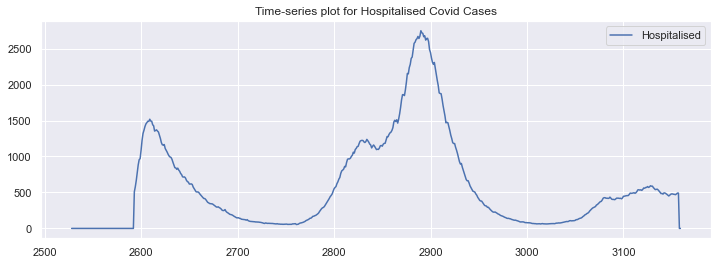

In [104]:
sample_ci_copy['Hospitalised'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time-series plot for Hospitalised Covid Cases')
plt.show(block=False)

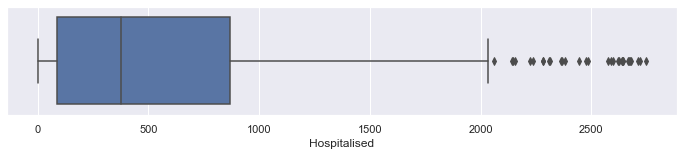

In [105]:
# Identify outlier
# whis=multiplicative factor
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=sample_ci_copy['Hospitalised'], whis=1.5)

In [106]:
# Removing outlier from dataset of hospitalised
cols = ['Hospitalised'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = sample_ci_copy[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = sample_ci_copy[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# # Return a boolean array of the rows with (any) non-outlier column values
condition = ~((sample_ci_copy[cols] < (Q1 - 1.5 * IQR)) | (sample_ci_copy[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
sample_ci_copy_nonoutlier = sample_ci_copy[condition]
sample_ci_copy_nonoutlier.shape

(600, 3)

In [107]:
lowest_outliers = Q1 - (1.5 * IQR)
lowest_outliers

Hospitalised   -1078.625
dtype: float64

In [108]:
highest_outliers = Q3 + (1.5 * IQR)
highest_outliers

Hospitalised    2034.375
dtype: float64

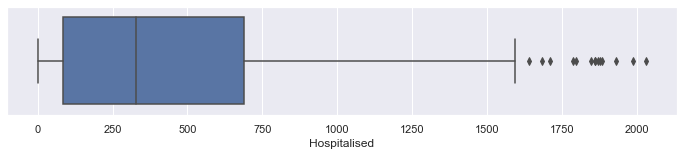

In [109]:
# Plot with outliers removed
# whis=multiplicative factor
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=sample_ci_copy_nonoutlier['Hospitalised'], whis=1.5)

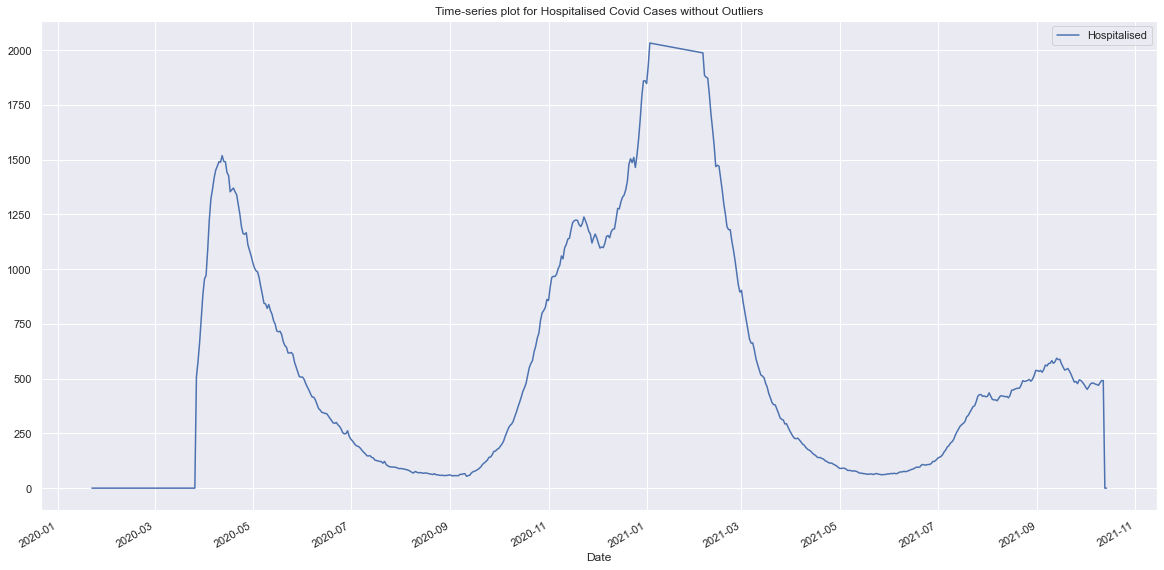

In [110]:
# Plot line plot without outliers
sample_ci_copy_nonoutlier.plot('Date','Hospitalised',figsize=(20, 10))
plt.legend(loc='best')
plt.title('Time-series plot for Hospitalised Covid Cases without Outliers')
plt.show(block=False)

**Report:** The moving average captures the average change in data series over time and eliminates the irregularities. In the chart below of Moving Average with seven days smoothing, the hospitalisation trend of Channel Islands can be better interpreted. Numbers reached peak in around February, but decreased significantly with a steep downward slope in March 2021. This corresponds with the time of vaccination program implemented beginning in January 2021, meaning vaccines may have reduced number of hospitalisation and symptoms of patients were less severe. The future trend is leaning towards a downward slope in October 2021.

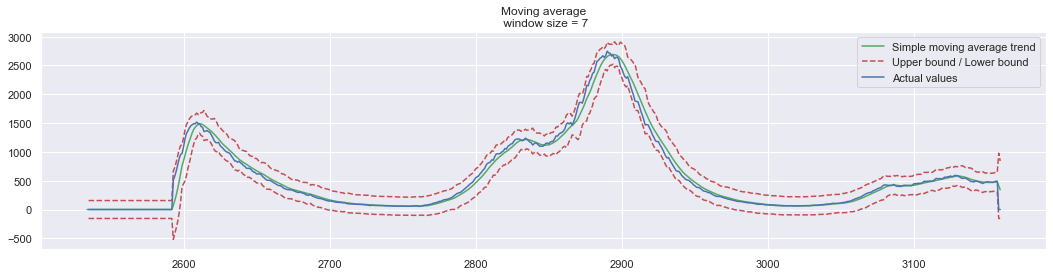

In [111]:
# Plot moving average with 7 days smoothing
plot_moving_average(sample_ci_copy.Hospitalised, 7, plot_intervals=True)

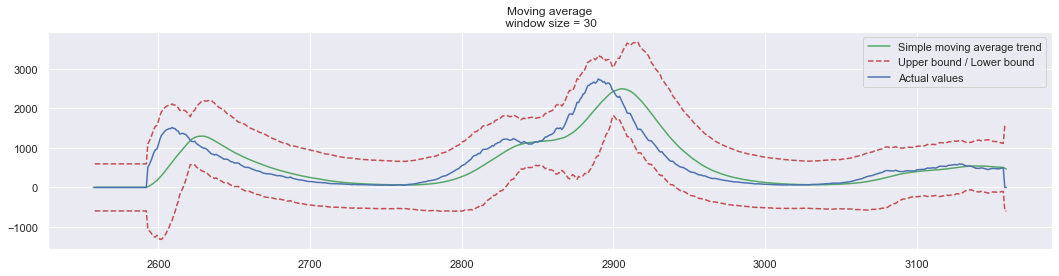

In [112]:
# Plot moving average with 30 days smoothing
plot_moving_average(sample_ci_copy.Hospitalised, 30, plot_intervals=True)

### Question 2:

**Instructions:** The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [113]:
# Return top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,error
2593,Channel Islands,2020-03-27,509,436.285714
2594,Channel Islands,2020-03-28,579,423.571429
2595,Channel Islands,2020-03-29,667,416.285714


**Report:** The 'error' column represents the mean absolute error (MAE) which is used to measure the accuracy of the SMA 7 days forecast. MAE is calculating the difference between the actual hospitalised value and the forecasted value moving average. It indicates how big of an error we can expect from the forecast on average. The top three days with the highest MAE implies that the forecast's distance from the true value is very high, therefore, is less accurate or reliable. This factor should be taken into consideration when the government is decision which areas to target for the vaccine marketing campaign in allocating resources based on forecasting of hospitalisation numbers. The lower the MAE value the better because it means that the forecasted values matches the real values and implies higher accuracy of the model.

### Question 3: (Presentation)

The management team had some additional questions around the project where they asked for additional feedback to be included in your final presentation. Make sure to answer the questions in the notebook in markdown format in preparation for your presentation. They expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

#### Question 3.1 (double click cell to edit)
- **What is the difference between qualitative and quantitative data and how can this be used in predictions?**

Difference between qualitative and quantative data is that qualitative data or categorical data are groups, dimensions, interpretation and descriptions. For example, province/state, date, or country in this covid data set. Whereas quantitative data is numeric and is used in calculations. For example, number of cases, deaths, recoveries, people who received first dose or fully vaccincated. Therefore, quantitative data indicates how many using calculations, while qualitative data helps the business to understand why, how, or what happened behind certain behaviours.

When understanding what type of data is received and what the business question is, the type of forecasting model can be determined either qualitative or quanitative methods. In this analysis, quantitative time-series method is used because covid data is quantifiable and statistical analysis is conduct to understand trends in each province over time period. Moreover, use of statistical models will result in accurate assessments of uncertainty and stronger forecasts.

#### Question 3.2 (double click cell to edit)
- **Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?**

It is important to iterate continuous improvement strategy to make consistent enhancements, such as improving data analystics processes, workflow of teams and quality of code. Continuous improvement will allow the government to increase quality of data collected and accuarcte forecasting. This will enable government to implement marketing campaigns at the right time to educate the public about vaccines or preventative measure to reduce cases and deaths numbers. Moreover, devise better strategies or policies based on data to ensure a healthy state of the United Kingdom.

#### Question 3.3 (double click cell to edit)
- **We adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics. We only work with aggregated data and therefore will not expose any personal details? (is it different, example of how it could apply to this case; two or three sentences max)**

Government should still adopt a data ethics framework which sets a clear and consistent approach to decsion-making and responsbilities. As covid and the vaccination program are affecting the people across United Kingdom, the framework ensure those with access to data understand what information can be shared as some may use data to make a profit from selling covid related products. Also, it ensures data is sourced ethically and mitigate risks of personal data from being exposed. More importantly, it will help build and sustain trust with the general public on data sharing. 

## Conclusion & Recommendation

In conclusion, Gilbraltar has the highest number of people 264,745 who are eligible to received second dose, then Montserrat and British Virgin Islands. According to the analysis, vaccinations have a positive impact on reducing daily numbers of cases, deaths, hospitalisation and increase number of recoveries as vaccines became avaliable in Janurary 2021. Beginning in March, the pandemic to stablised as the line plot indicated a flat slope for deaths and cases in majority of the regions.

Therefore, the government is recommended to target Gilbraltar, Montserrat and British Virgin Islands for their marketing campaign to increase the vaccination rate. Also, emphasis on the postive impacts of vaccinations based on the graphs in the analysis to support educational message that vaccinations can help reduce serverity of symptoms as deaths decreased and leading to faster recoveries as numbers increased.

During end of March after peak of the pandemic, top 4 of the trending hashtags were covid related on Twitter. The government can consider monitoring external data like tweets to get realtime market information on the reaction of the public to the campaigns implemented. However, completeness and reliablitity of data must be validated.

Lastly, the government is advised to invest in data resources to forecasting vaccination and covid cases trends to devise better strategy to mitigate the negative impacts of the pandemic.